# Machin Learning Model to predict the claim amount in the Automobile Insurance

In [1]:
#data analysis and wrangling
import pandas as pd
import numpy as np

#visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

#model developing-machine learning
import sklearn
from scipy.stats import zscore                                                          #for removing the outliers
from sklearn.preprocessing import StandardScaler                                        #for standardizing the input dataset
from sklearn.model_selection import train_test_split                                    #to train the model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error                                 #for reporting purposes

#boosting techniques
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

#saving the model using joblib
import pickle
#for filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#acquiring the data
Insurance_df=pd.read_csv("Auto_Insurance_claims_amount.csv")

In [3]:
#previewing the data
Insurance_df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [4]:
#checking the structure of the dataset
Insurance_df.shape

(9134, 26)

In [5]:
#checking for all the informations
Insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Country                        9134 non-null   object 
 2   State Code                     9134 non-null   object 
 3   State                          9134 non-null   object 
 4   Claim Amount                   9134 non-null   float64
 5   Response                       9134 non-null   object 
 6   Coverage                       9134 non-null   object 
 7   Education                      9134 non-null   object 
 8   Effective To Date              9134 non-null   object 
 9   EmploymentStatus               9134 non-null   object 
 10  Gender                         9134 non-null   object 
 11  Income                         9134 non-null   int64  
 12  Location Code                  9134 non-null   o

In [6]:
#checking the structure of the dataset
Insurance_df.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [7]:
#sns.barplot(x=Insurance_df['Claim Amount'], y=Insurance_df['Number of Policies'])
#plt.title('Claim Amount vs Number of Policies')

In [8]:
#sns.barplot(x=Insurance_df['Claim Amount'], y=Insurance_df['Income'])
#plt.title('Claim Amount vs Income')

In [9]:
#converting sting data to int or float data using label encoder
from sklearn.preprocessing import LabelEncoder
le_x = LabelEncoder() 
for col in Insurance_df.columns:
    Insurance_df[col] = le_x.fit_transform(Insurance_df[col])
Insurance_df.sample(5)

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
8725,7026,0,2,2,644,0,0,1,19,1,...,36,0,0,1,3,2,3,2577,0,2
925,2627,0,2,2,6092,0,0,1,52,1,...,30,0,2,0,2,3,3,3825,3,1
4353,1677,0,3,3,645,1,0,3,11,1,...,23,0,0,1,4,1,2,2425,0,2
4343,7378,0,2,2,584,0,0,3,26,1,...,10,0,0,1,5,1,1,2425,0,1
5914,6941,0,0,0,213,0,0,3,41,1,...,13,3,0,0,1,1,0,2355,5,1


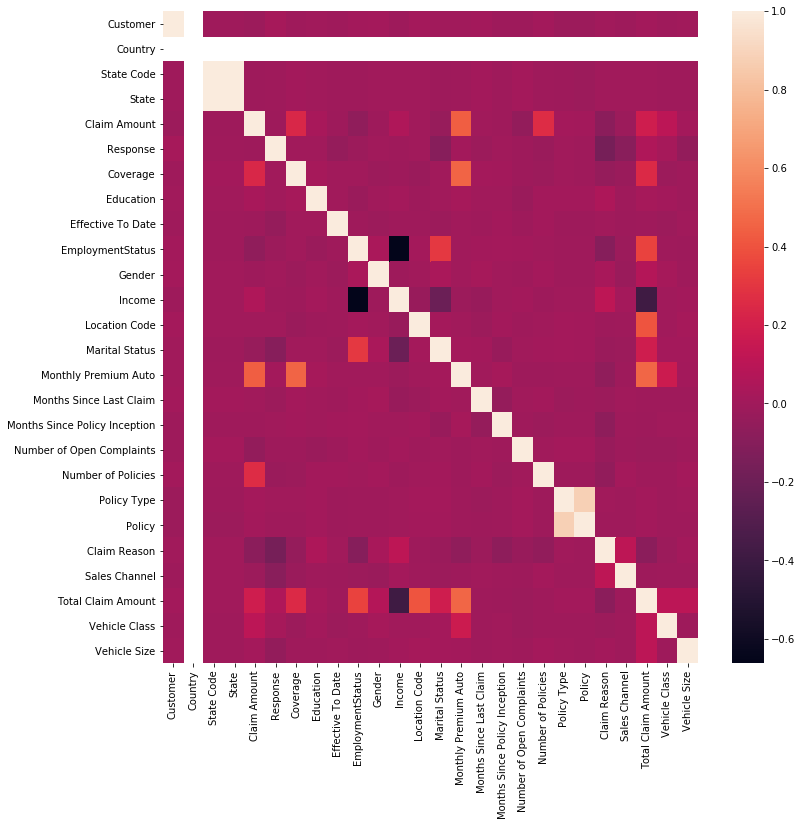

In [10]:
#checking for the correlation
corr_hmap=Insurance_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_hmap)

In [11]:
Insurance_df.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

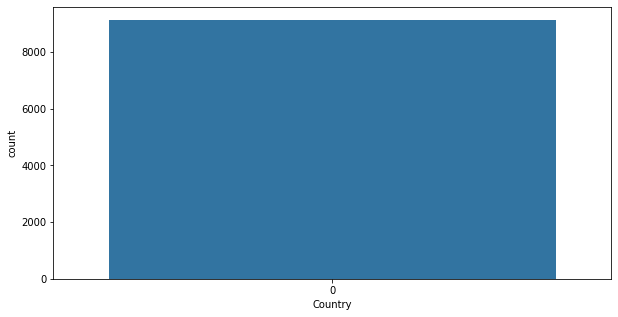

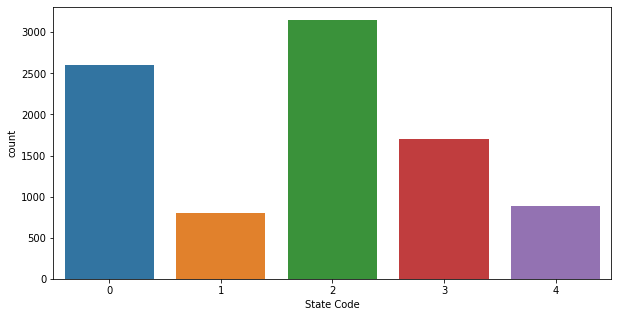

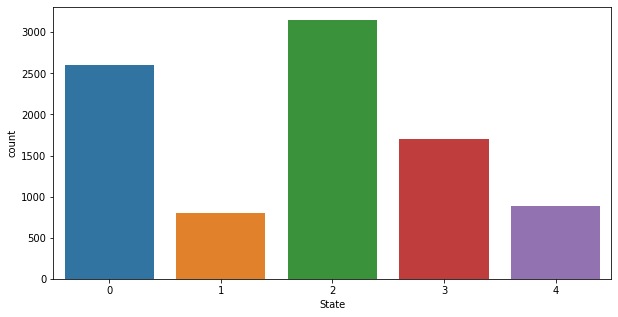

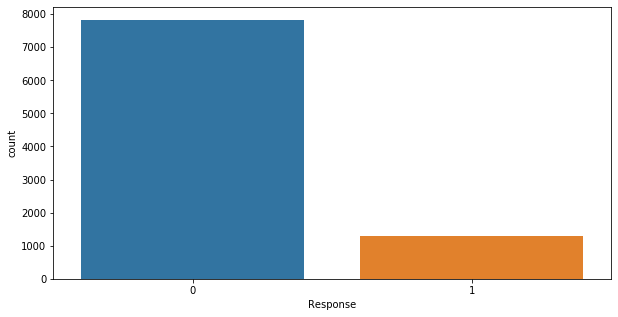

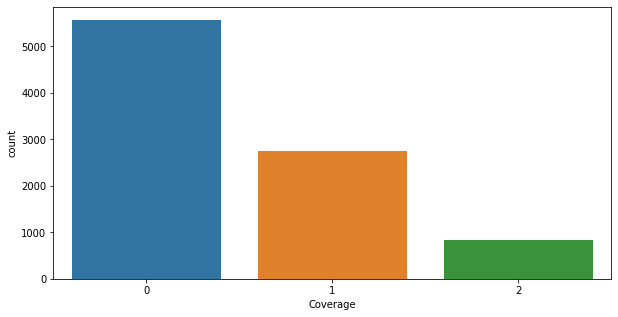

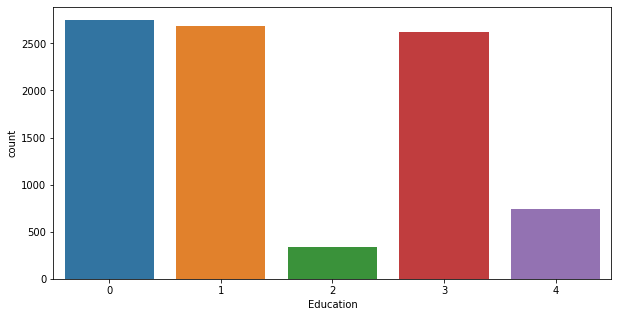

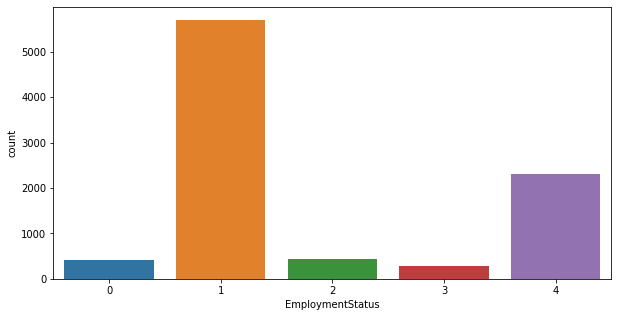

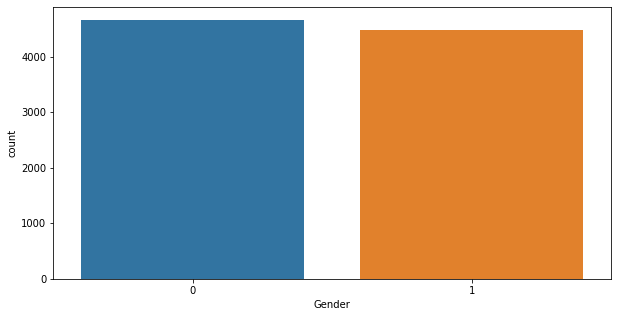

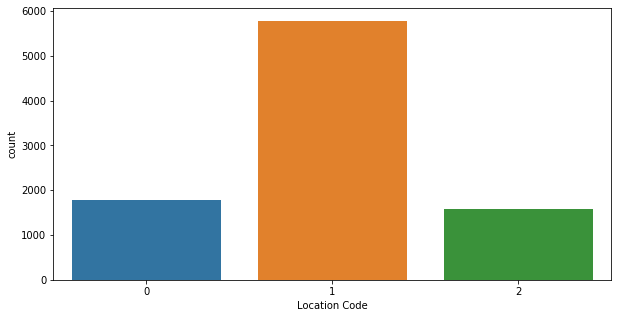

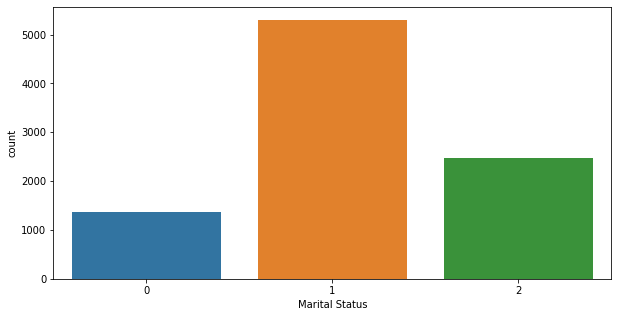

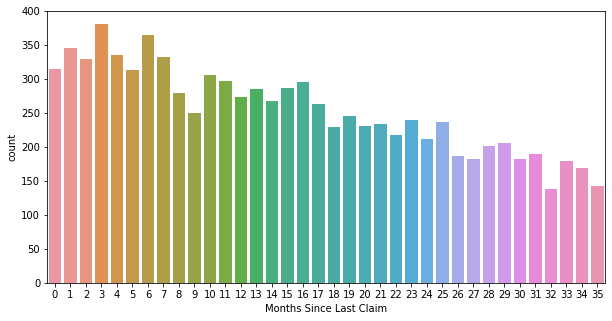

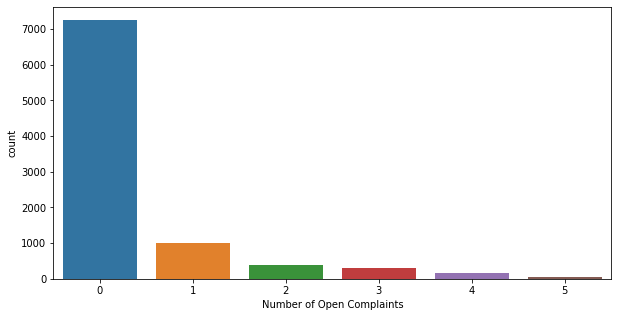

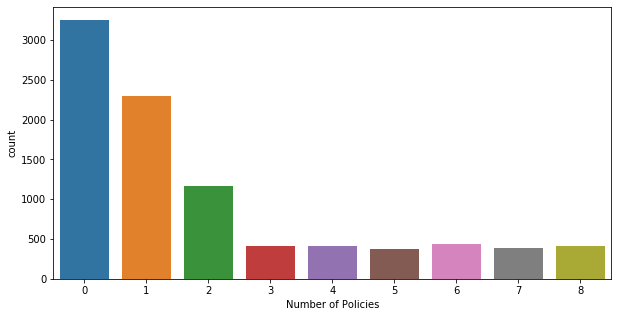

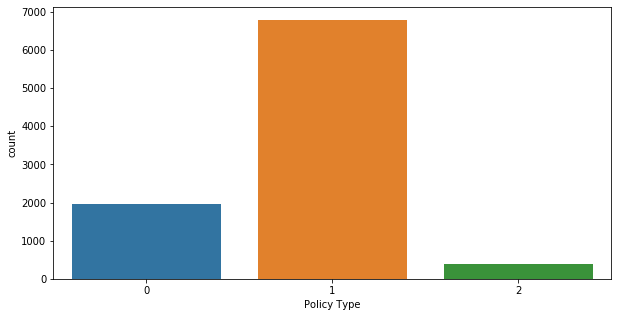

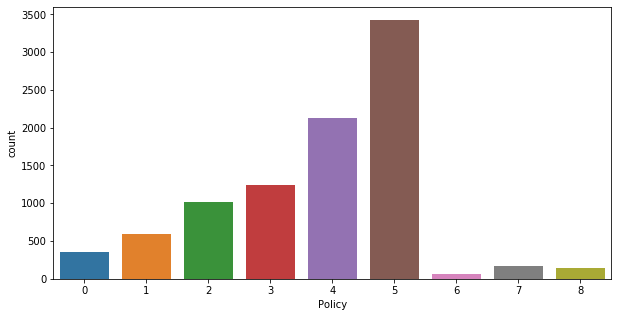

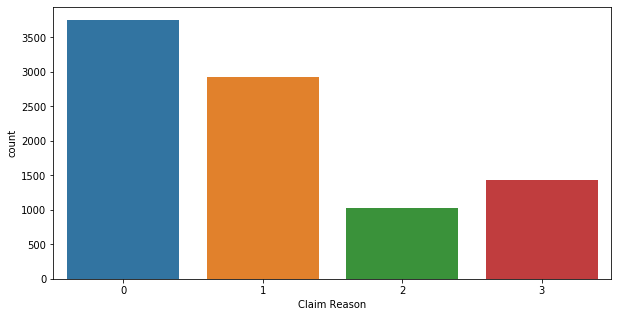

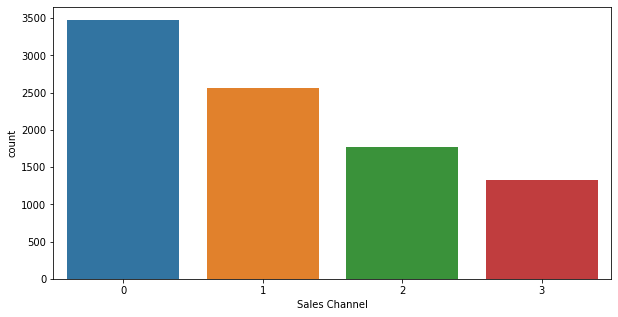

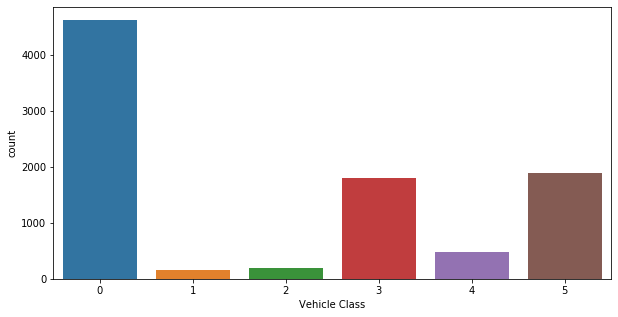

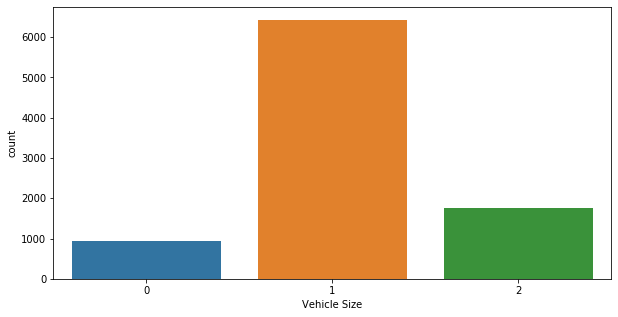

In [12]:
#printing different countplot
data_columns=['Country', 'State Code', 'State',
       'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Months Since Last Claim','Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size']
for i in range(len(data_columns)):
    fig,ax=plt.subplots(figsize=(10,5))
    sns.countplot(data=Insurance_df,x=data_columns[i])

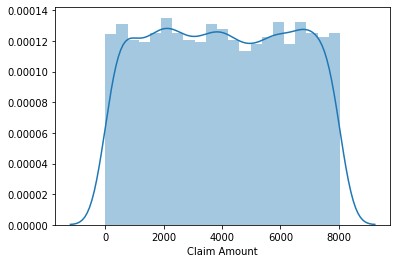

In [13]:
#vizualizing the distribution
sns.distplot(Insurance_df["Claim Amount"],kde=True)

Customer                            AxesSubplot(0.125,0.799681;0.168478x0.0803191)
Country                          AxesSubplot(0.327174,0.799681;0.168478x0.0803191)
State Code                       AxesSubplot(0.529348,0.799681;0.168478x0.0803191)
State                            AxesSubplot(0.731522,0.799681;0.168478x0.0803191)
Claim Amount                        AxesSubplot(0.125,0.703298;0.168478x0.0803191)
Response                         AxesSubplot(0.327174,0.703298;0.168478x0.0803191)
Coverage                         AxesSubplot(0.529348,0.703298;0.168478x0.0803191)
Education                        AxesSubplot(0.731522,0.703298;0.168478x0.0803191)
Effective To Date                   AxesSubplot(0.125,0.606915;0.168478x0.0803191)
EmploymentStatus                 AxesSubplot(0.327174,0.606915;0.168478x0.0803191)
Gender                           AxesSubplot(0.529348,0.606915;0.168478x0.0803191)
Income                           AxesSubplot(0.731522,0.606915;0.168478x0.0803191)
Loca

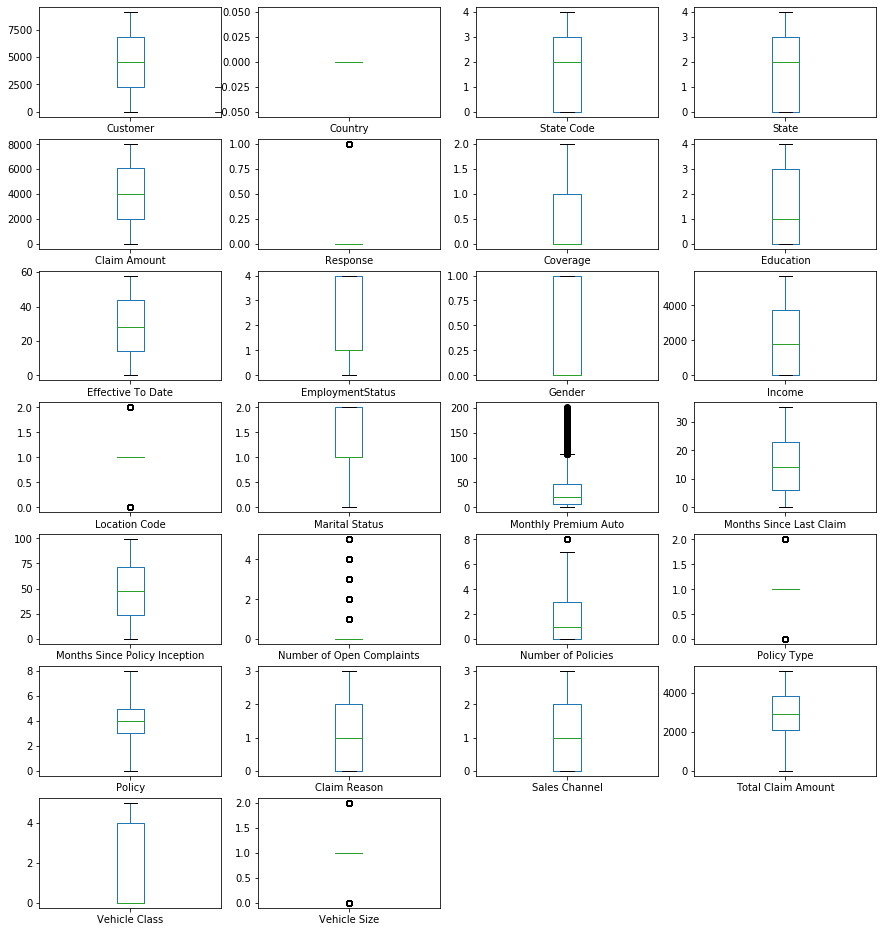

In [14]:
#checking for the outliers
Insurance_df.plot(kind='box',subplots=True,layout=(8,4),figsize=(15,19))

In [15]:
#checking the skewness before removing the outliers
Insurance_df.skew()

Customer                         0.000000
Country                          0.000000
State Code                       0.021065
State                            0.021065
Claim Amount                     0.004370
Response                         2.037567
Coverage                         1.031310
Education                        0.333148
Effective To Date                0.033899
EmploymentStatus                 0.832147
Gender                           0.039866
Income                           0.371418
Location Code                    0.009511
Marital Status                  -0.107553
Monthly Premium Auto             1.977663
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Policy Type                     -0.468383
Policy                          -0.427639
Claim Reason                     0.733526
Sales Channel                    0.506774
Total Claim Amount              -0

In [16]:
#removing outliers
z_score=np.abs(zscore(Insurance_df))
print(Insurance_df.shape)
Insurance_df_final=Insurance_df.loc[(z_score<3).all(axis=1)]
print(Insurance_df_final.shape)

(9134, 26)
(0, 26)


In [17]:
#Now separating input and output variable
x=Insurance_df.drop(['Claim Amount','Vehicle Size','Location Code','Policy Type','Response','Number of Open Complaints'],axis=1)
y=Insurance_df['Claim Amount']
print(x.shape)
print(y.shape)

(9134, 20)
(9134,)


In [18]:
#standardizing the input dataset 
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.50430908,  0.        , -0.55068994, ..., -1.03113846,
         0.06743268,  1.49918077],
       [ 0.52318023,  0.        ,  0.97332215, ..., -1.03113846,
         1.57020982, -0.91292371],
       [-1.69545285,  0.        ,  1.73532819, ..., -1.03113846,
         0.80835839,  1.49918077],
       ...,
       [ 0.80458634,  0.        ,  0.21131611, ..., -0.09602938,
         1.30515062, -0.91292371],
       [ 1.00407369,  0.        ,  0.21131611, ..., -0.09602938,
         1.12379433, -0.91292371],
       [ 1.46676298,  0.        ,  0.21131611, ...,  0.83907971,
        -0.02092038,  1.49918077]])

In [19]:
#Machine Learning Models
models=[]
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))

In [20]:
r2_scr_results = []
names = []
for name, model in models:
    print(name)
    max_r2_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.10)
        model_name=model
        model_name.fit(x_train,y_train)
        y_pred=model_name.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("random state: ",r_state," accuracy score: ",r2_scr)
        if r2_scr>max_r2_score:
            max_r2_score=r2_scr      
            final_r_state=r_state
    r2_scr_results.append(max_r2_score*100)
    print()
    print("max accuracy score at random state:",final_r_state," for the model ",name," is: ",max_r2_score)
    print()
    print()

LR
random state:  42  accuracy score:  0.2756412353885489
random state:  43  accuracy score:  0.275348347860382
random state:  44  accuracy score:  0.23956227845759293
random state:  45  accuracy score:  0.26870894264637835
random state:  46  accuracy score:  0.2729763737840559
random state:  47  accuracy score:  0.26802266403371977
random state:  48  accuracy score:  0.294798903451587
random state:  49  accuracy score:  0.25929063301150934
random state:  50  accuracy score:  0.3004894245861509
random state:  51  accuracy score:  0.22807996015417387
random state:  52  accuracy score:  0.300489631921799
random state:  53  accuracy score:  0.25761211583611565
random state:  54  accuracy score:  0.24907982805138884
random state:  55  accuracy score:  0.2817579048554596
random state:  56  accuracy score:  0.3097169563692228
random state:  57  accuracy score:  0.2960730230764369
random state:  58  accuracy score:  0.2677357499151509
random state:  59  accuracy score:  0.29270455073131874
ra

KeyboardInterrupt: 

In [22]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [23]:
y_pred = reg_rf.predict(x_test)

In [24]:
reg_rf.score(x_train, y_train)

0.9960172378112477

In [25]:
reg_rf.score(x_test, y_test)

0.9707192894332157

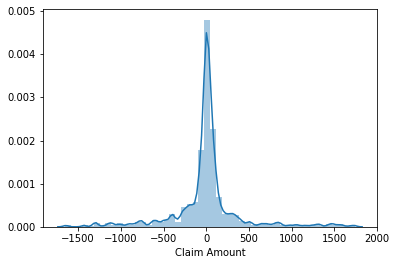

In [26]:
sns.distplot(y_test-y_pred)
plt.show()

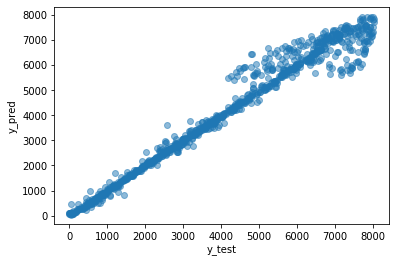

In [33]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [35]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 215.57234135667395
MSE: 159494.22542713344
RMSE: 399.36728136783245


In [36]:
metrics.r2_score(y_test, y_pred)

0.9707192894332156

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [39]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [43]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [44]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  12.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  12.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  12.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  11.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  11.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  17.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   7.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.6s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 15.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [45]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [46]:
prediction = rf_random.predict(x_test)

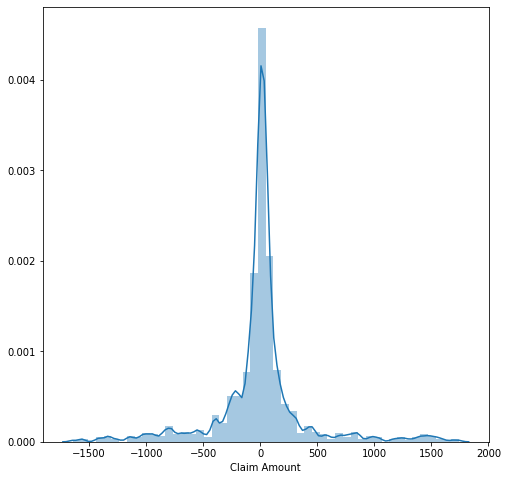

In [47]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

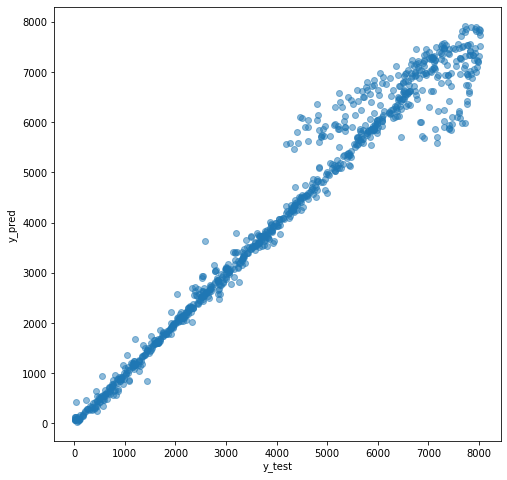

In [48]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 220.45475874978143
MSE: 161964.9398709133
RMSE: 402.448679797702


In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [75, 100],'max_depth':[20, 30]}]
forest_reg = RandomForestRegressor(n_jobs=-1)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [51]:
grid_search.best_params_

{'max_depth': 20, 'n_estimators': 75}

In [61]:
from sklearn.metrics import r2_score
from sklearn.svm import SVC
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed r2_score report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, grid_search.predict(x_test)
    print(r2_score(y_true, y_pred))
    print()

-162457.826 (+/-10679.832) for {'max_depth': 20, 'n_estimators': 75}

Detailed r2_score report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

0.9695381825087676

-163554.064 (+/-6478.470) for {'max_depth': 20, 'n_estimators': 100}

Detailed r2_score report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

0.9695381825087676

-165507.313 (+/-6588.177) for {'max_depth': 30, 'n_estimators': 75}

Detailed r2_score report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

0.9695381825087676

-163261.478 (+/-12506.765) for {'max_depth': 30, 'n_estimators': 100}

Detailed r2_score report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

0.9695381825087676



In [63]:
#saving the model as pickle in a file
pickle.dump(rf_random,open('automobile_data.pkl','wb'))

In [64]:
#loading the model for testing
loaded_model=pickle.load(open('automobile_data.pkl','rb'))
loaded_model.predict(x_test)

array([6743.27173891, 2722.35117276, 3289.35141779, 7119.84321543,
       2860.44789755, 6426.2054258 , 5162.62097171, 7448.04185204,
       7473.49436041, 3042.0153538 , 1746.35407593, 6091.42827514,
       6785.4279933 , 6088.27323039,  319.94798657, 3484.20421436,
       3253.22326121, 3670.99019663,   60.11457849, 5852.5100742 ,
       3726.55738437, 2866.37475458, 5910.97088632, 5966.15504347,
       6257.74473088, 6640.74035903, 6549.77606151, 4254.19208727,
       1774.30932695, 2376.52235188, 7262.69657681, 7036.93184786,
       1179.03299496, 7276.55924642, 6557.60811968, 5137.85884459,
       6346.41413593, 3850.36283108, 3756.19945114, 6923.33626868,
       5832.46988416, 1803.88783617, 7003.1761153 , 4064.02920205,
        262.71398407,  488.79541003, 3730.21897464, 6582.02042076,
       3080.09295132, 6951.51361648, 6016.41731672, 3608.69292554,
       2097.73041251, 7513.0613731 , 1174.80813578, 2291.72759387,
        413.42688795, 1173.73715606, 5792.57952747,   97.00665